**Review of an article by Sasha Stoykov, 2008**

Sasha Stoykov's article, dated 2008, touches on the topical and complex topic of high-frequency trading within the limit order system. The author explores two trading strategies: the "inventory" strategy and the "symmetrical" strategy, based on different levels of risk that the investor is willing to accept.

For clarity, Stoikov uses mathematical models and simulations, presenting the results in the form of tables and graphs. The author pays special attention to the parameter \(\lambda\), which symbolizes the investor's risk level.

An interesting point of the study is that with \(\lambda = 0.01\) (almost a risk-neutral investor), both strategies are practically indistinguishable in their P&L profiles. While for an extremely risk aversive investor (\( \lambda = 1 \)), the inventory strategy turns out to be preferable in terms of stability, but inferior in terms of profit.

In the final part of the article, a mathematical appendix is given, in which a model based on geometric Brownian motion is disclosed in detail. This part requires the reader to have a deep knowledge of financial mathematics, but serves as an excellent addition to the main part of the study.

In general, Sasha Stoikov's article is a valuable contribution to the study of the mechanisms of high-frequency trading. It is enriched with high-quality analytics and can serve as a practical guide for traders, as well as a theoretical basis for further scientific work.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define the fraction of the dataset you'd like to read (e.g., 0.1 for 10%)
fraction = 0.1

# Load a subset of the data
book_data = pd.read_csv('book.csv', skiprows=lambda i: i > 0 and np.random.rand() > fraction)
ticker_data = pd.read_csv('ticker.csv', skiprows=lambda i: i > 0 and np.random.rand() > fraction)
trades_data = pd.read_csv('trades.csv', skiprows=lambda i: i > 0 and np.random.rand() > fraction)

# Display the head of each dataframe
display(book_data.head())
display(ticker_data.head())
display(trades_data.head())


,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,bids[22].price,bids[22].amount,asks[23].price,asks[23].amount,bids[23].price,bids[23].amount,asks[24].price,asks[24].amount,bids[24].price,bids[24].amount
0,binance-futures,BTCUSDT,1679443203339000000,1679443203341692928,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
1,binance-futures,BTCUSDT,1679443205352000000,1679443205354799872,28090.9,6.092,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
2,binance-futures,BTCUSDT,1679443206447000000,1679443206456370176,28090.8,1.999,28090.7,0.002,28090.9,6.153,...,28087.6,0.002,28093.2,0.014,28087.5,0.099,28093.3,0.008,28087.4,0.001
3,binance-futures,BTCUSDT,1679443206537000000,1679443206562549760,28089.6,9.305,28089.5,0.040,28089.8,0.520,...,28086.8,0.045,28092.2,0.002,28086.7,0.705,28092.3,0.020,28086.6,0.240
4,binance-futures,BTCUSDT,1679443206603000000,1679443206638473984,28089.6,8.253,28087.3,0.003,28089.8,0.520,...,28084.8,2.001,28092.2,0.002,28084.7,0.027,28092.3,0.020,28084.5,2.300


,local_ts,seq,remote_ts,remote_ts2,bid_price,bid_amount,ask_price,ask_amount
0,1679443200046167040,2664656598852,1679443200017,1679443200011,28091.1,0.165,28091.2,15.672
1,1679443200055811584,2664656601361,1679443200036,1679443200030,28091.1,0.165,28091.2,16.005
2,1679443200055932416,2664656601462,1679443200036,1679443200031,28091.1,0.165,28091.2,16.183
3,1679443206615689712,2664658166668,1679443206582,1679443203864,28088.2,0.430,28089.6,8.264
4,1679443206627403520,2664658168264,1679443206593,1679443203875,28088.2,0.429,28089.6,8.260


,local_ts,seq,remote_ts,remote_ts2,price,amount,side
0,1679443200022597923,3467110987,1679443200001,1679443199996,28091.1,0.008,S
1,1679443205350924288,3467110994,1679443205348,1679443203176,28090.9,0.585,B
2,1679443206491181554,3467111020,1679443206480,1679443203781,28089.5,0.004,S
3,1679443206615414528,3467111034,1679443206581,1679443203861,28089.2,0.001,S
4,1679443206615423134,3467111041,1679443206581,1679443203861,28088.7,0.001,S


In [7]:
# Assuming 'local_ts' is a datetime column, set it as the index for resampling
ticker_data['local_ts'] = pd.to_datetime(ticker_data['local_ts'])
ticker_data.set_index('local_ts', inplace=True)

# Resample to 1-hour candlesticks
ohlc_dict = {
    'bid_price': 'ohlc',
    'ask_price': 'ohlc'
}

resampled_data = ticker_data.resample('1H').apply(ohlc_dict)

display(resampled_data.head())

bid_price                            ask_price           \
                         open     high      low    close      open     high   
local_ts                                                                      
2023-03-22 00:00:00   28091.1  28099.7  27930.0  28014.9   28091.2  28099.8   
2023-03-22 01:00:00   28014.9  28079.9  27960.0  28077.0   28015.0  28080.0   
2023-03-22 02:00:00   28077.0  28135.6  28031.1  28036.5   28077.1  28135.7   
2023-03-22 03:00:00   28036.5  28282.8  28004.0  28137.6   28036.6  28284.3   
2023-03-22 04:00:00   28137.6  28215.0  28111.0  28187.9   28137.7  28215.1   

                                       
                         low    close  
local_ts                               
2023-03-22 00:00:00  27930.1  28015.0  
2023-03-22 01:00:00  27960.1  28077.1  
2023-03-22 02:00:00  28031.2  28036.6  
2023-03-22 03:00:00  28004.1  28137.7  
2023-03-22 04:00:00  28111.1  28188.0

/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_33730/1506217607.py:29: RuntimeWarning: overflow encountered in exp
  lambdaA = A * np.exp(-k * deltaA)


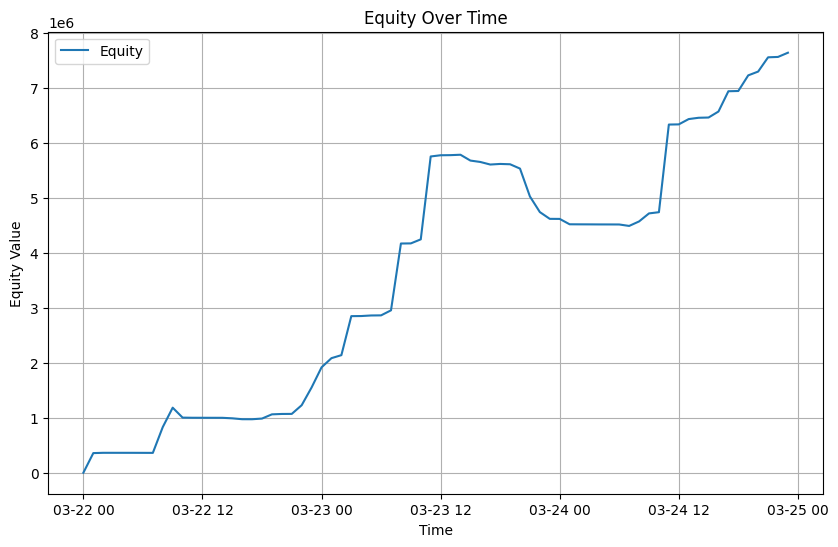

In [10]:
# https://github.com/rspadim/hft-avellaneda/blob/master/test.py

import matplotlib.pyplot as plt
import math

gamma = 0.1 
k = 1.5
A = 140
sigma = book_data[['asks[0].price', 'bids[0].price']].values.std()

equity = []
q = 0  
w = 0  

for index, (timestamp, row) in enumerate(resampled_data.iterrows()):
    
    S = (row['bid_price']['close'] + row['ask_price']['close']) / 2.0
    T = len(resampled_data) - index

    ReservPrice = S - q * gamma * sigma**2 * T
    spread = gamma * sigma**2 * T + (2/gamma) * math.log(1 + (gamma/k))
    
    Bid = ReservPrice - spread/2.
    Ask = ReservPrice + spread/2.

    deltaB = S - Bid
    deltaA = Ask - S

    lambdaA = A * np.exp(-k * deltaA)
    lambdaB = A * np.exp(-k * deltaB)

    # Если мы достигли конца trades_data, прекратим проход
    if index >= len(trades_data):
        break

    trade_price = trades_data['price'].iloc[index]
    trade_amount = trades_data['amount'].iloc[index]
    
    # Измените условия на основе средней цены
    if trade_price >= S:
        q += trade_amount
        w -= Bid * trade_amount
    elif trade_price <= S:
        q -= trade_amount
        w += Ask * trade_amount

    equity.append(w + q * S)

# Если trades_data закончился, но у нас еще есть resampled_data, дополним наш equity.
if len(equity) < len(resampled_data):
    last_equity_value = equity[-1]
    equity.extend([last_equity_value] * (len(resampled_data) - len(equity)))

plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, equity, label='Equity')
plt.xlabel('Time')
plt.ylabel('Equity Value')
plt.title('Equity Over Time')
plt.legend()
plt.grid(True)
plt.show()

**Review: Enhancing Trading Strategies with Order Book Signals**

This research delves into the nuances of high-frequency data from the Nasdaq exchange, with a specific focus on the volume imbalance in the limit order book (LOB). By meticulously analyzing the data, the authors establish that their devised measure adeptly predicts the nature of the imminent market order (MO), discerning whether it would be a buy or sell. Not stopping there, the measure also provides insights into predicting price shifts following the arrival of an MO.

The brilliance of the volume imbalance measure lies in its ability to encapsulate buying and selling pressures within the LOB. The empirical evidence presented in the study reaffirms a long-held belief: when the LOB leans heavily towards buying, there's a heightened probability for the next MO to also be a buy order. Similarly, a sell-heavy LOB is indicative of an upcoming sell order. A fascinating observation made was the positive price revision in a buy-heavy LOB, a trend which was mirrored for sell-heavy conditions as well. This correlation between volume imbalance and MO activities was found to be consistent across a broad spectrum of Nasdaq stocks, thereby accentuating its reliability.

While the technical prowess of the measure is commendable, its simplicity ensures its feasibility for a wide array of trading algorithms. Implementing this measure into trading models stands to greatly reduce the adverse selection costs and harness favorable price movements, as illustrated by the paper.

The authors further enhance the practical applicability of their findings by proposing an algorithmic trading strategy. This strategy is centered on an agent optimizing liquidity provision to the LOB. The primary aim for the agent is to bolster expected terminal wealth, all the while completing roundtrip trades and penalizing inventory positions. The practical validation of the strategy was sought through trade data spanning from 1 July to 31 December 2014. The results were rather promising, with the inclusion of the volume imbalance process amplifying the strategy's efficacy. Notably, the strategy's Sharpe ratio outperformed several renowned models in the domain.

In conclusion, this research is an invaluable addition to the high-frequency trading literature. It not only offers a robust and practical measure for predicting MOs and price shifts but also provides a tested strategy that promises improved returns. The study's results underscore the importance of integrating LOB signals, particularly volume imbalance, into trading algorithms to enhance their performance.